![](http://pic1.tsingdataedu.com/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%B7%A5%E7%A8%8B%E5%B8%88banner.png)

## PCA exercise based on MNIST digital data set (full version)

In [1]:
# Download the MNIST dataset. Depending on the network connection, it might take 2 mins to finish downloading.
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="./")
data = mnist.data
label = mnist.target
num_insts, num_feats = data.shape
print("Number of data instances in MNIST =", num_insts)
print("Number of feature per instance =", num_feats)

/opt/conda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


Number of data instances in MNIST = 70000
Number of feature per instance = 784


In [3]:
data.shape

(70000, 784)

In [4]:
# Implement the PCA algorithm.
# Step one: compute the mean vector and remove the mean.
img_mean = np.mean(data, axis=0)
d = data - img_mean

In [6]:
img_mean.shape

(784,)

In [8]:
d.shape

(70000, 784)

In [11]:
# Step two: compute the covariance matrix.
img_cov = np.dot(d.T, d) / num_insts
print("Size of the covariance matrix =", img_cov.shape)

Size of the covariance matrix = (784, 784)


In [12]:
eigvals, eigvectors = np.linalg.eigh(img_cov)

In [14]:
eigvals.shape

(784,)

In [16]:
eigvectors.shape

(784, 784)

In [17]:
ridx = np.arange(num_feats - 1, -1, -1)

In [18]:
ridx

array([783, 782, 781, 780, 779, 778, 777, 776, 775, 774, 773, 772, 771,
       770, 769, 768, 767, 766, 765, 764, 763, 762, 761, 760, 759, 758,
       757, 756, 755, 754, 753, 752, 751, 750, 749, 748, 747, 746, 745,
       744, 743, 742, 741, 740, 739, 738, 737, 736, 735, 734, 733, 732,
       731, 730, 729, 728, 727, 726, 725, 724, 723, 722, 721, 720, 719,
       718, 717, 716, 715, 714, 713, 712, 711, 710, 709, 708, 707, 706,
       705, 704, 703, 702, 701, 700, 699, 698, 697, 696, 695, 694, 693,
       692, 691, 690, 689, 688, 687, 686, 685, 684, 683, 682, 681, 680,
       679, 678, 677, 676, 675, 674, 673, 672, 671, 670, 669, 668, 667,
       666, 665, 664, 663, 662, 661, 660, 659, 658, 657, 656, 655, 654,
       653, 652, 651, 650, 649, 648, 647, 646, 645, 644, 643, 642, 641,
       640, 639, 638, 637, 636, 635, 634, 633, 632, 631, 630, 629, 628,
       627, 626, 625, 624, 623, 622, 621, 620, 619, 618, 617, 616, 615,
       614, 613, 612, 611, 610, 609, 608, 607, 606, 605, 604, 60

In [19]:
# Step three: compute the eigen-decomposition of the covariance matrix. 
# Note: the default ordering of eigenvalues is in ascending order, but you should order them 
# in descending order. 
eigvals, eigvectors = np.linalg.eigh(img_cov)
ridx = np.arange(num_feats - 1, -1, -1)
eigvals = eigvals[ridx]
eigvectors = eigvectors[:, ridx]

In [32]:
# Step four: Select projection dimension. Compute the projection and its reconstruction image.
k = 2
proj = eigvectors[:, :k]
# Compute the projection image.
proj_img = np.dot(data, proj)
# Compute the reconstruction image.
recons_img = np.dot(proj_img, proj.T)

In [33]:
proj_img.shape

(70000, 2)

In [35]:
proj_img

array([[-1773.21603143,  -307.40520502],
       [-1796.28279374,  -368.62527706],
       [-1378.14860693,  -261.66188083],
       ...,
       [ -628.41934217,   742.01969374],
       [ -775.93754283,   852.96436014],
       [-1103.77120255,   941.87918524]])

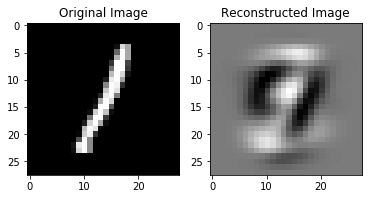

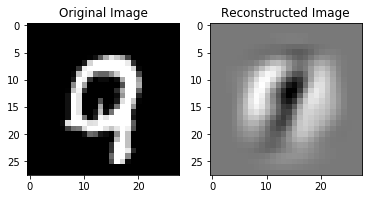

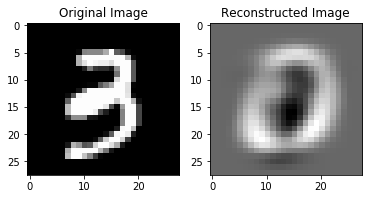

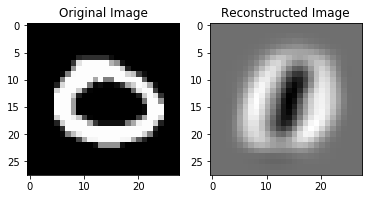

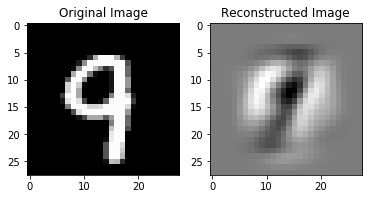

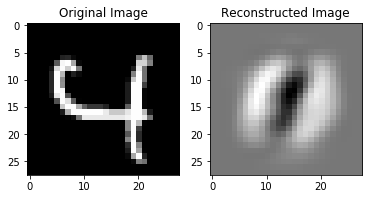

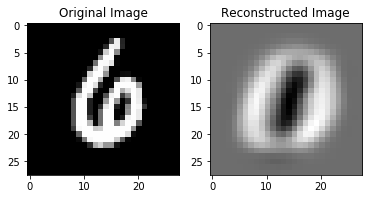

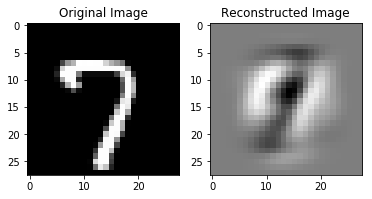

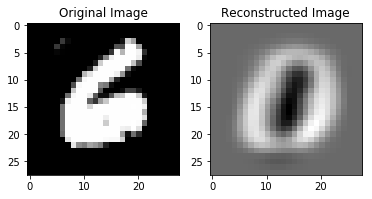

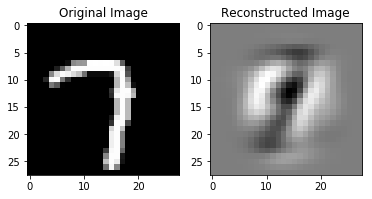

In [34]:
# Step five: visualize the original image and the reconstructed image.
for j in range(10):
    idx = np.random.randint(num_insts)
    fig = plt.figure()
    plt.gray()
    fig.add_subplot(1, 2, 1)
    plt.imshow(data[idx, :].reshape(28, 28))
    plt.title("Original Image")
    fig.add_subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(recons_img[idx, :].reshape(28, 28))
    plt.show()

In [50]:
proj_img.shape

(70000, 2)

In [54]:
proj_img

array([[-1773.21603143,  -307.40520502],
       [-1796.28279374,  -368.62527706],
       [-1378.14860693,  -261.66188083],
       ...,
       [ -628.41934217,   742.01969374],
       [ -775.93754283,   852.96436014],
       [-1103.77120255,   941.87918524]])

In [44]:
proj_img[:,0]

array([-1773.21603143, -1796.28279374, -1378.14860693, ...,
        -628.41934217,  -775.93754283, -1103.77120255])

In [52]:
proj_img[0][0]

-1773.2160314285077

In [53]:
proj_img[0][1]

-307.4052050215751

In [45]:
proj_img[:,1]

array([-307.40520502, -368.62527706, -261.66188083, ...,  742.01969374,
        852.96436014,  941.87918524])

In [47]:
label

array([0., 0., 0., ..., 9., 9., 9.])

<IPython.core.display.Javascript object>


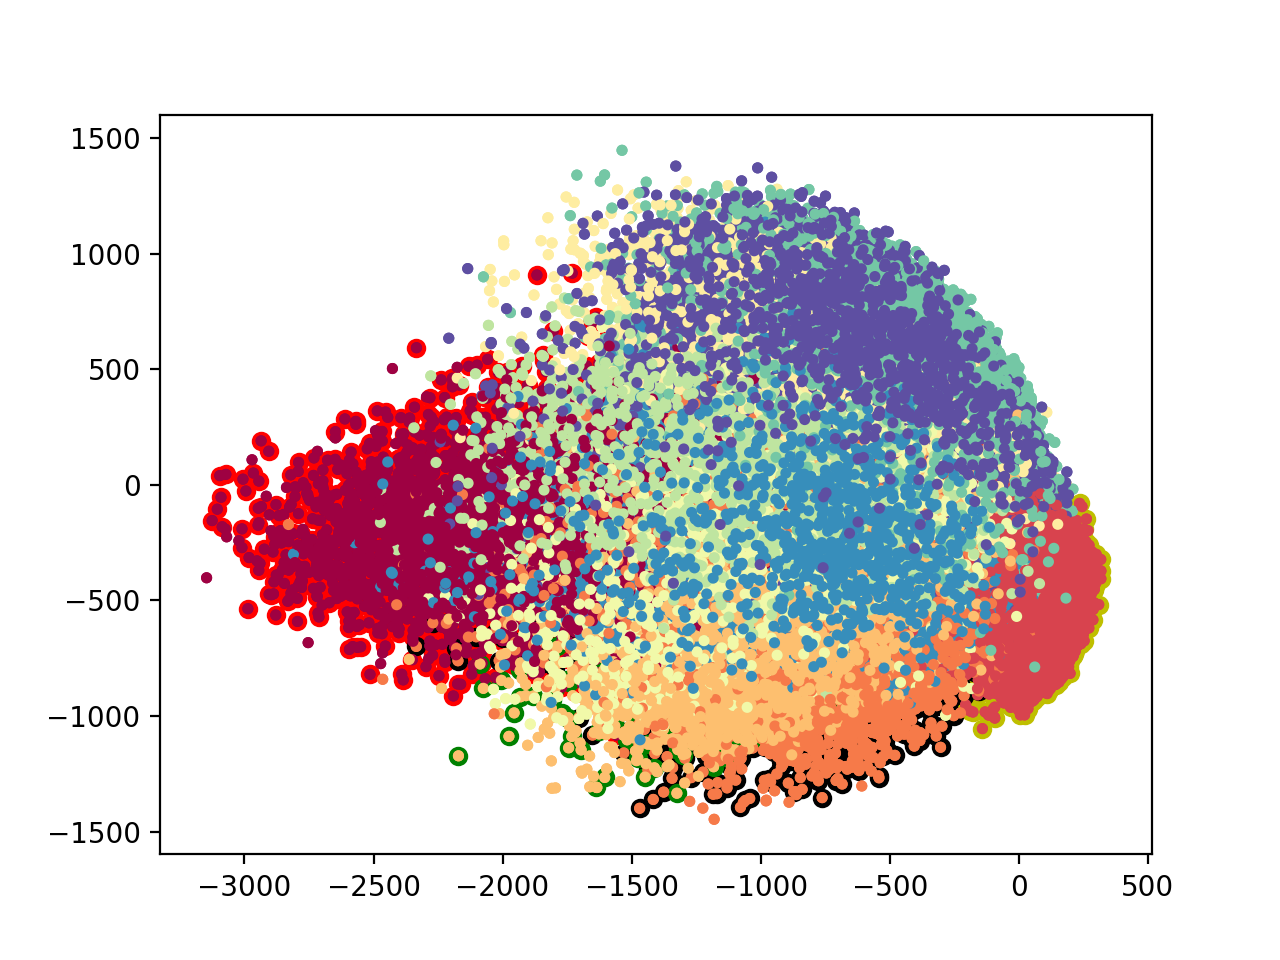

In [61]:
color = ['r','y','k','g','m','b','p','c','w','r']
for i in range(20000):
    digit = int(label[i])
    plt.scatter(proj_img[i][0],proj_img[i][1],c = color[digit])
plt.show()

In [62]:
plt.scatter(proj_img[:,0],proj_img[:,1],c=label,cmap = plt.cm.Spectral,marker = '.')
plt.show()

In [57]:
digit

0.0

In [63]:
plt.scatter(proj_img[:,0],proj_img[:,1],c=label,cmap = plt.cm.Spectral,marker = '.')
plt.show()

In [64]:
# 三维可视化
k = 3
proj = eigvectors[:, :k]
# Compute the projection image.
proj_img = np.dot(data, proj)
# Compute the reconstruction image.
recons_img = np.dot(proj_img, proj.T)

In [66]:
proj.shape

(784, 3)

<IPython.core.display.Javascript object>


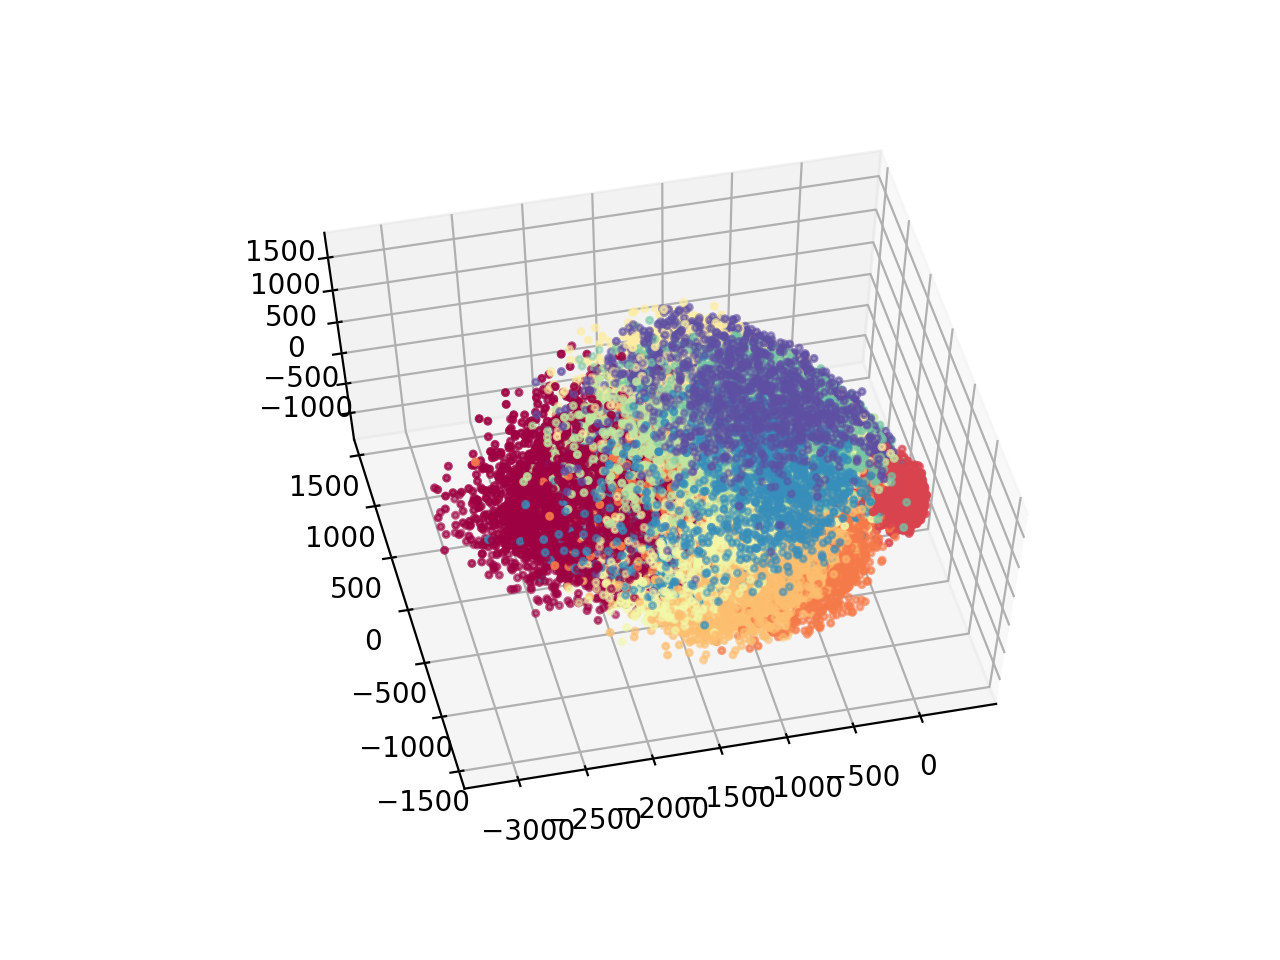

In [68]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(proj_img[:,0],proj_img[:,1],proj_img[:,2],c=label,cmap=plt.cm.Spectral,marker = '.')
plt.show()